In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
bgl = pd.read_csv('Cars (2).csv')

In [3]:
bgl.columns

Index(['Age', 'Gender', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance',
       'license', 'Transport'],
      dtype='object')

In [4]:
# There are 444 rows and 9 columns
bgl.shape

(444, 9)

In [5]:
#Average Age is 27 years, minimum age is 18 & maximum is 43, this means that population is young
#Average work experience is 6 years
#Average salary is 16 Lakhs per annum, min is 6.5 Lakh & max is 57 Lakh. This means that they have good spending capacity
#Average distance is 11 km, which is good for taking a cab to office
bgl.describe().T

count       mean        std   min   25%   50%     75%   max
Age       444.0  27.747748   4.416710  18.0  25.0  27.0  30.000  43.0
Engineer  444.0   0.754505   0.430866   0.0   1.0   1.0   1.000   1.0
MBA       444.0   0.252252   0.434795   0.0   0.0   0.0   1.000   1.0
Work Exp  444.0   6.299550   5.112098   0.0   3.0   5.0   8.000  24.0
Salary    444.0  16.238739  10.453851   6.5   9.8  13.6  15.725  57.0
Distance  444.0  11.323198   3.606149   3.2   8.8  11.0  13.425  23.4
license   444.0   0.234234   0.423997   0.0   0.0   0.0   0.000   1.0

In [6]:
#Datatype for all is fine except GENDER & TRANSPORT. It should be categorical.
bgl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [7]:
#We need to make private transport as 0 and public transport as 1 because public transport is favourable condition
#We need to treat column 'GENDER' because it is Male/ Female
bgl.head(10)

Age  Gender  Engineer  MBA  Work Exp  Salary  Distance  license  \
0   28    Male         0    0         4    14.3       3.2        0   
1   23  Female         1    0         4     8.3       3.3        0   
2   29    Male         1    0         7    13.4       4.1        0   
3   28  Female         1    1         5    13.4       4.5        0   
4   27    Male         1    0         4    13.4       4.6        0   
5   26    Male         1    0         4    12.3       4.8        1   
6   28    Male         1    0         5    14.4       5.1        0   
7   26  Female         1    0         3    10.5       5.1        0   
8   22    Male         1    0         1     7.5       5.1        0   
9   27    Male         1    0         4    13.5       5.2        0   

           Transport  
0   Public Transport  
1   Public Transport  
2   Public Transport  
3   Public Transport  
4   Public Transport  
5   Public Transport  
6  Private Transport  
7   Public Transport  
8   Public Transport  
9   Public Transport

In [8]:
bgl.tail(10)

Age  Gender  Engineer  MBA  Work Exp  Salary  Distance  license  \
434   40    Male         1    0        22    45.0      19.8        1   
435   37    Male         0    0        19    42.0      20.7        1   
436   43    Male         1    1        24    52.0      20.8        1   
437   28  Female         1    1         7    13.0      21.0        1   
438   34    Male         1    0        14    38.0      21.3        1   
439   40    Male         1    0        20    57.0      21.4        1   
440   38    Male         1    0        19    44.0      21.5        1   
441   37    Male         1    0        19    45.0      21.5        1   
442   37    Male         0    0        19    47.0      22.8        1   
443   39    Male         1    1        21    50.0      23.4        1   

             Transport  
434  Private Transport  
435  Private Transport  
436  Private Transport  
437  Private Transport  
438  Private Transport  
439  Private Transport  
440  Private Transport  
441  Private Transport  
442  Private Transport  
443  Private Transport

In [9]:
#No NULL values
bgl.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [10]:
#Checking the target variable
bgl['Transport'].value_counts()

Public Transport     300
Private Transport    144
Name: Transport, dtype: int64

In [11]:
300+144

444

In [12]:
#Here we can understand that the data is not un-balanced
public_trans = 100*(300/444)
public_trans1 = round(public_trans,2)
print("The percentage of Employees going by Public Transport is",public_trans1)
private_trans = 100*(144/444)
private_trans1 = round(private_trans,2)
print("The percentage of Employees going by Private Transport is",private_trans1)

The percentage of Employees going by Public Transport is 67.57
The percentage of Employees going by Private Transport is 32.43


In [13]:
#Outlier Function
Q1 = bgl.quantile(0.25)
Q3 = bgl.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [14]:
#We can see presence of outliers in columns Age, Distance, Engineer, Salary, Work Exp, license
((bgl > UL) | (bgl < LL)).sum()

Age           25
Distance       9
Engineer     109
Gender         0
MBA            0
Salary        59
Transport      0
Work Exp      38
license      104
dtype: int64

In [15]:
for column in bgl.columns:
    print(bgl[column].unique())
    print(bgl[column].value_counts())

[28 23 29 27 26 22 25 24 32 34 30 20 33 21 31 19 39 36 35 38 40 18 37 42
 43]
26    63
27    49
28    46
24    46
25    37
30    34
29    26
23    24
31    16
22    15
32    13
33    11
34    11
38     9
21     8
39     7
40     7
36     6
20     5
37     4
35     2
18     2
19     1
42     1
43     1
Name: Age, dtype: int64
['Male' 'Female']
Male      316
Female    128
Name: Gender, dtype: int64
[0 1]
1    335
0    109
Name: Engineer, dtype: int64
[0 1]
0    332
1    112
Name: MBA, dtype: int64
[ 4  7  5  3  1  2  9 13  6  8  0 11 10 19 16 12 21 17 14 18 15 20 22 24]
4     54
2     47
3     46
6     46
5     42
0     29
7     28
8     28
1     22
9     21
10    14
11    11
19    10
14     8
21     6
20     6
16     5
12     5
18     5
13     3
22     3
17     2
15     2
24     1
Name: Work Exp, dtype: int64
[14.3  8.3 13.4 12.3 14.4 10.5  7.5 13.5 11.5  8.5 15.5 16.5  8.6 11.4
 10.6 14.6  9.5 13.6  7.6 16.6 12.5 12.6  9.6  8.4 36.6 11.7  6.5 15.6
 21.7  7.7 13.7 15.4  8.7 12.4 21.6 14

In [16]:
#Data Visualization
#Continuos Variables
bgl1 = bgl[['Age','Work Exp','Salary','Distance']]
#Categorical Variables
bgl2 = bgl[['Gender','Engineer','MBA','license','Transport']]

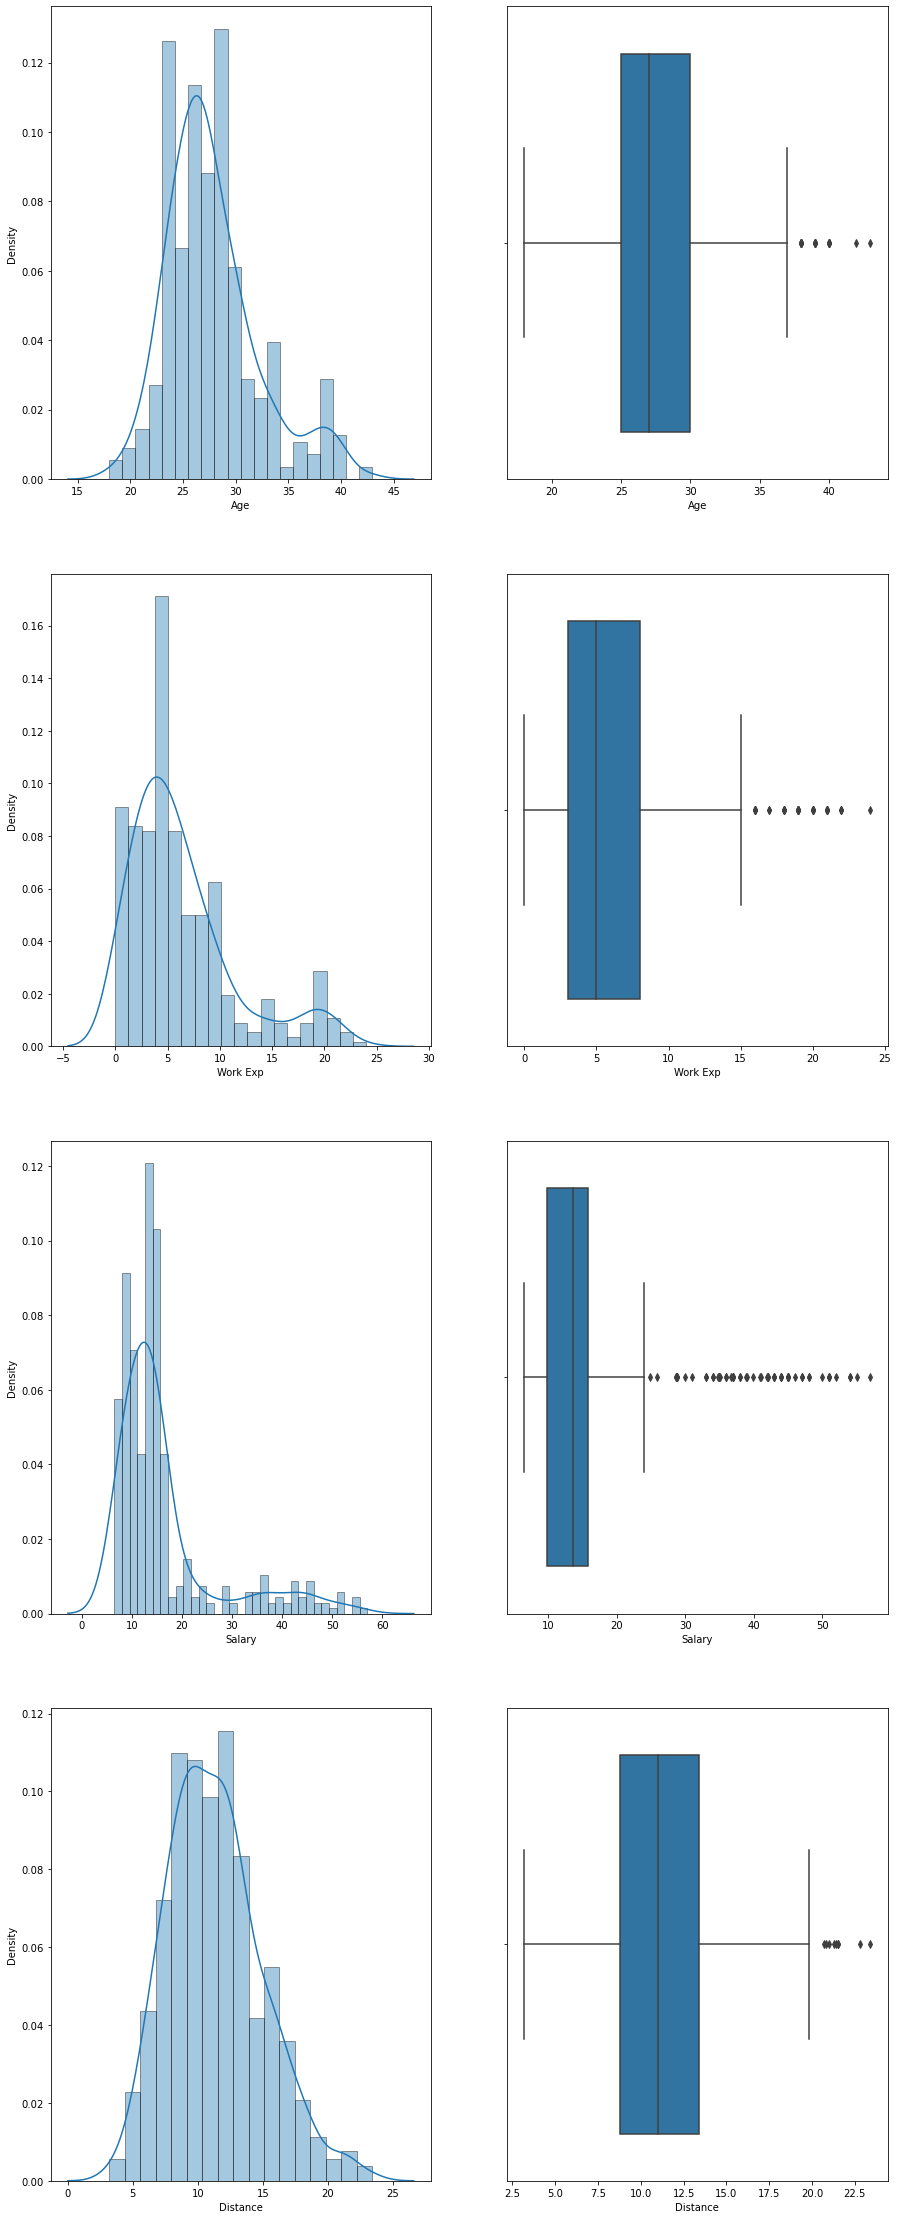

In [17]:
#For Continuos variables
l2 = len(bgl1.columns)
n = 1
fig = plt.figure(figsize=(15,40))
for column in bgl1.columns:
        plt.subplot(l2, 2, n)
        plt.xlabel(column)
        sns.distplot(bgl1[column], hist_kws= dict(ec = 'black'))
        n = n + 1
        plt.subplot(l2, 2, n)
        plt.xlabel(column)
        sns.boxplot(x = bgl1[column])
        n = n + 1

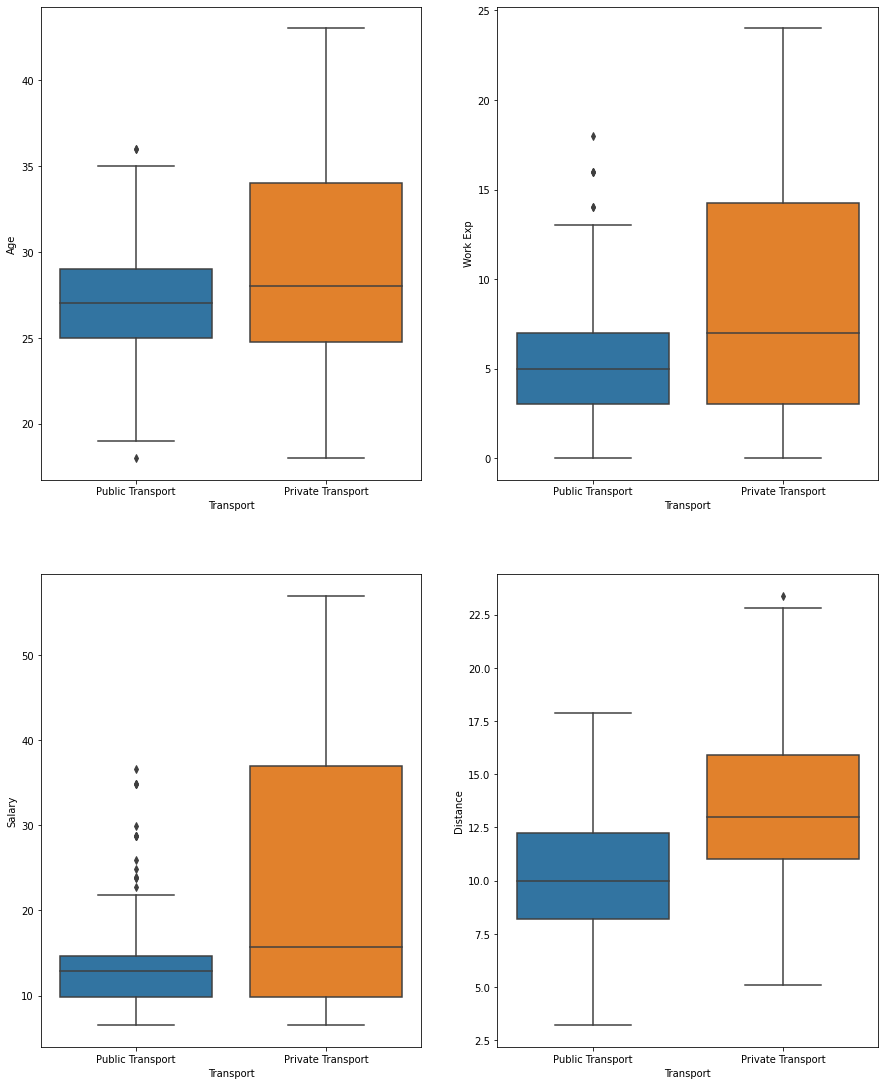

In [18]:
#Bivariate Analysis for continuos variables
l1 = len(bgl1.columns)
n = 1
fig = plt.figure(figsize=(15,40))
for col in bgl1.columns:
    plt.subplot(l1, 2, n)
    plt.xlabel(col)
    sns.boxplot(x = bgl['Transport'],y = bgl1[col])
    n = n + 1

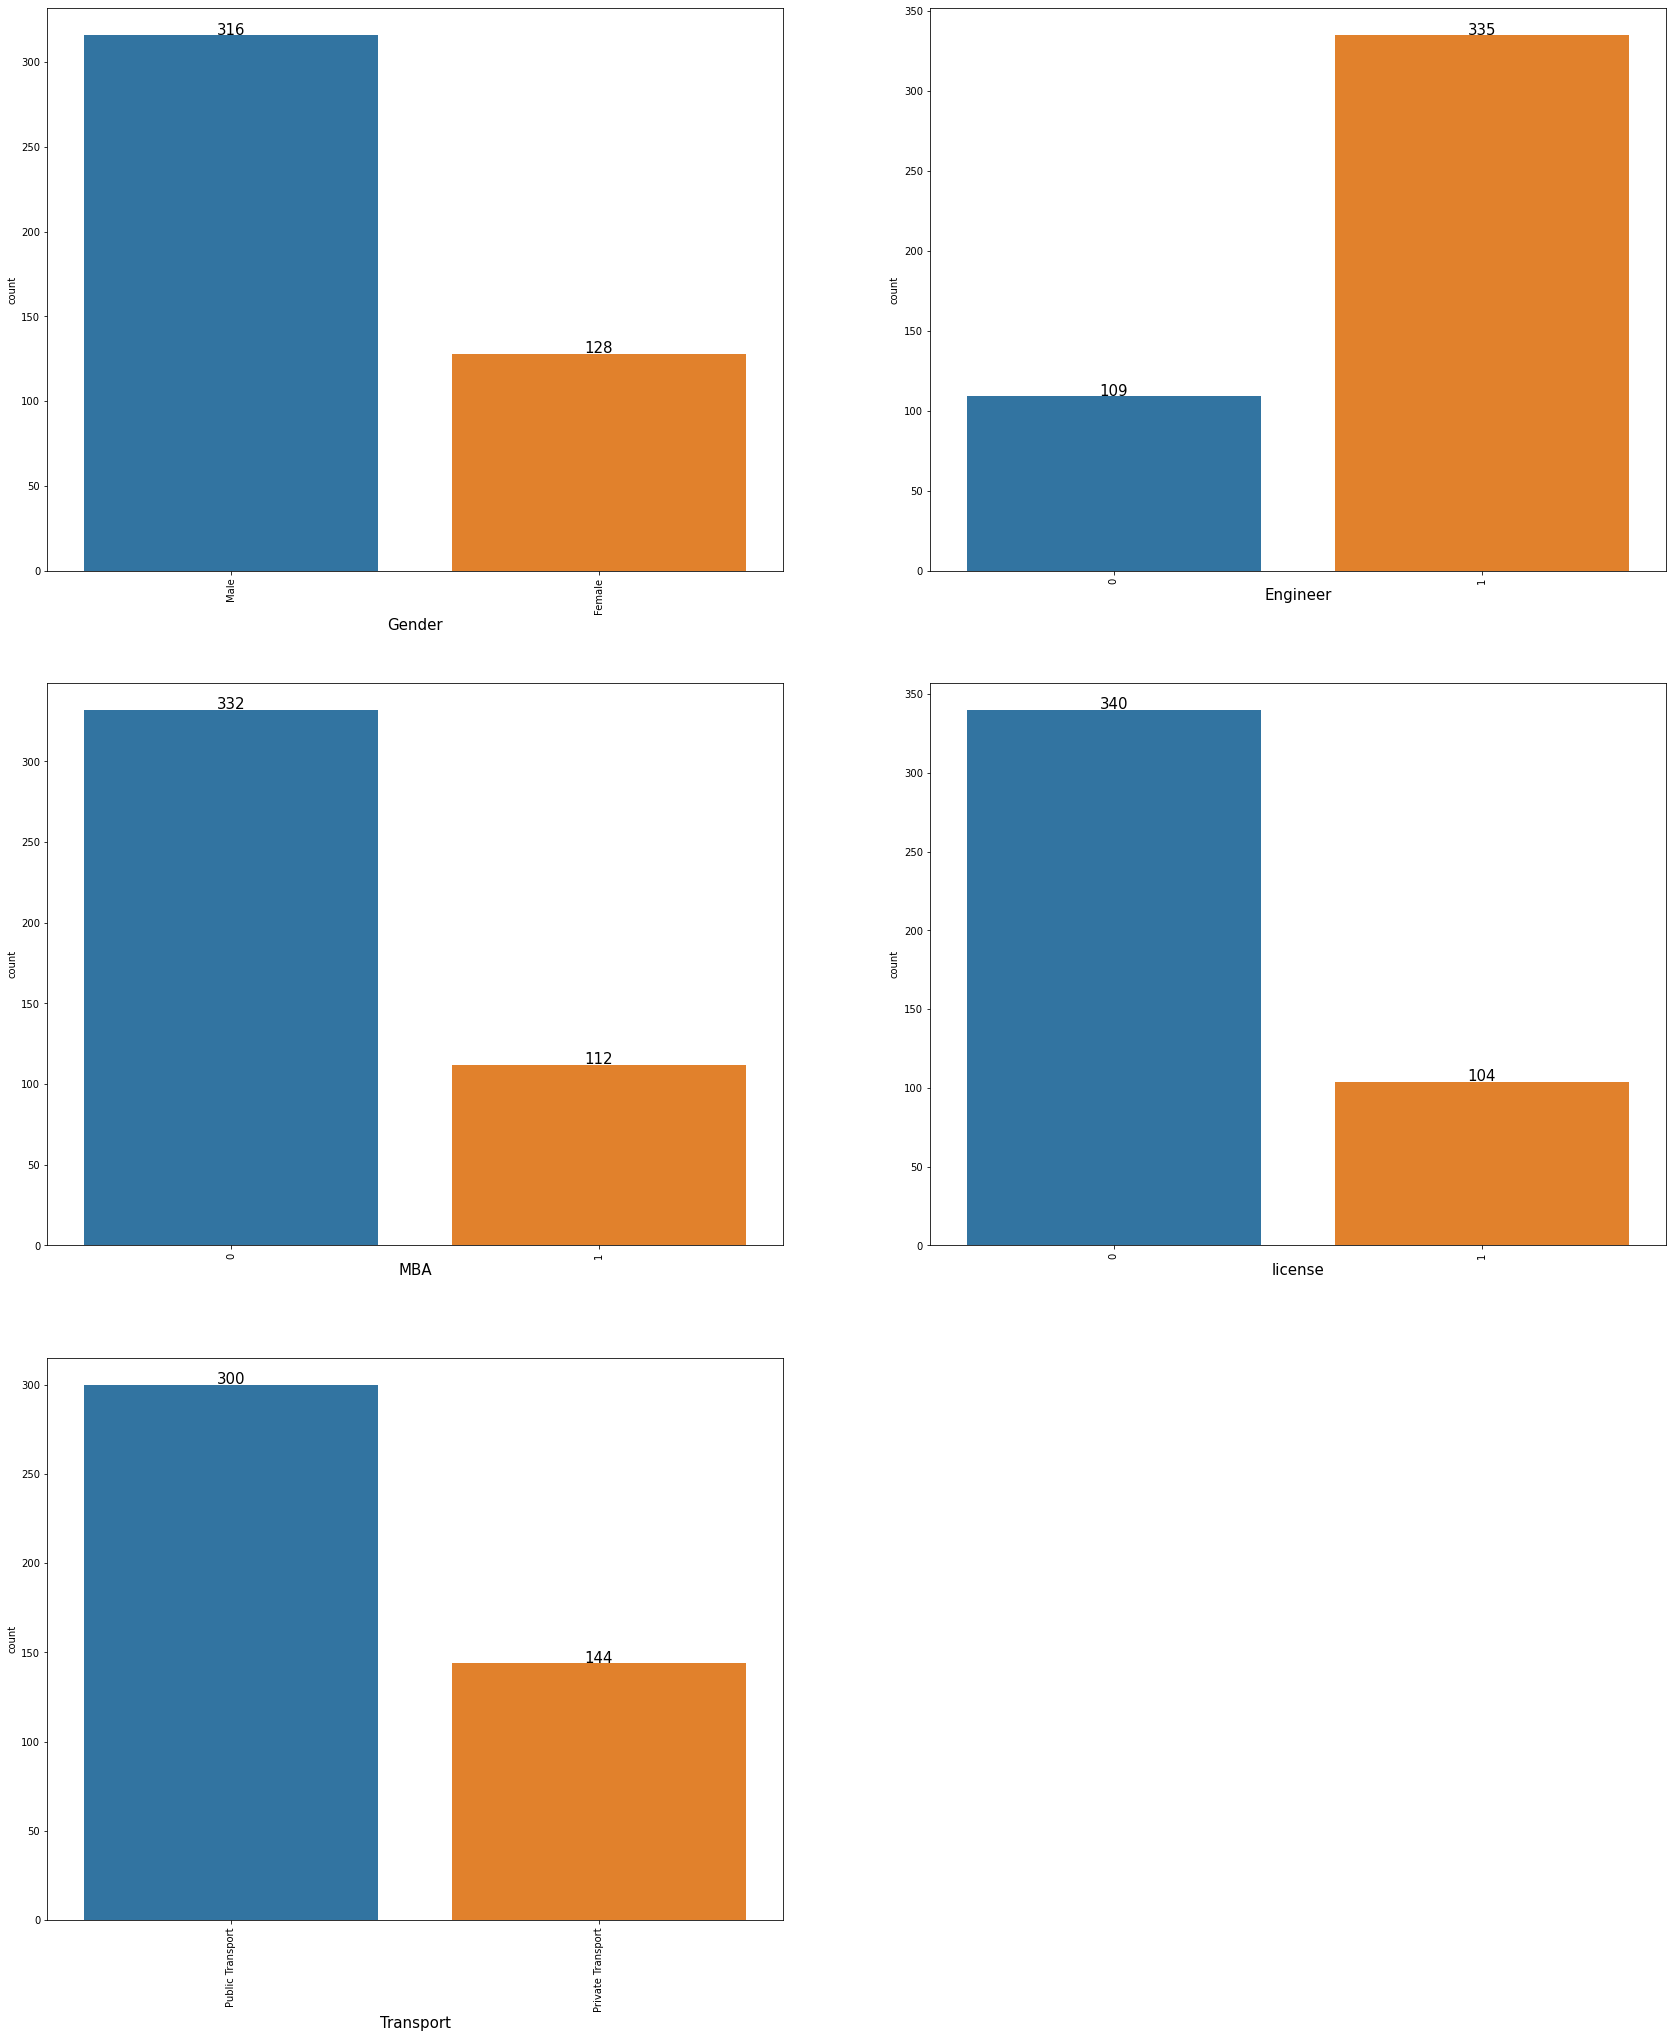

In [19]:
#For Categorical Variable
l1 = len(bgl2.columns)
n = 1
fig = plt.figure(figsize=(l1*5.8,l1*12))
for column in bgl2.columns:
    plt.subplot(l1, 2, n)
    plt.xlabel(column,fontsize =15)
    plt.xticks(rotation=90)
    ax1 = sns.countplot(bgl2[column])
    n = n + 1
    for q in ax1.patches:
        ax1.annotate(format(q.get_height()), (q.get_x() + q.get_width() / 2,
        q.get_height()), ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points',fontsize = 15)

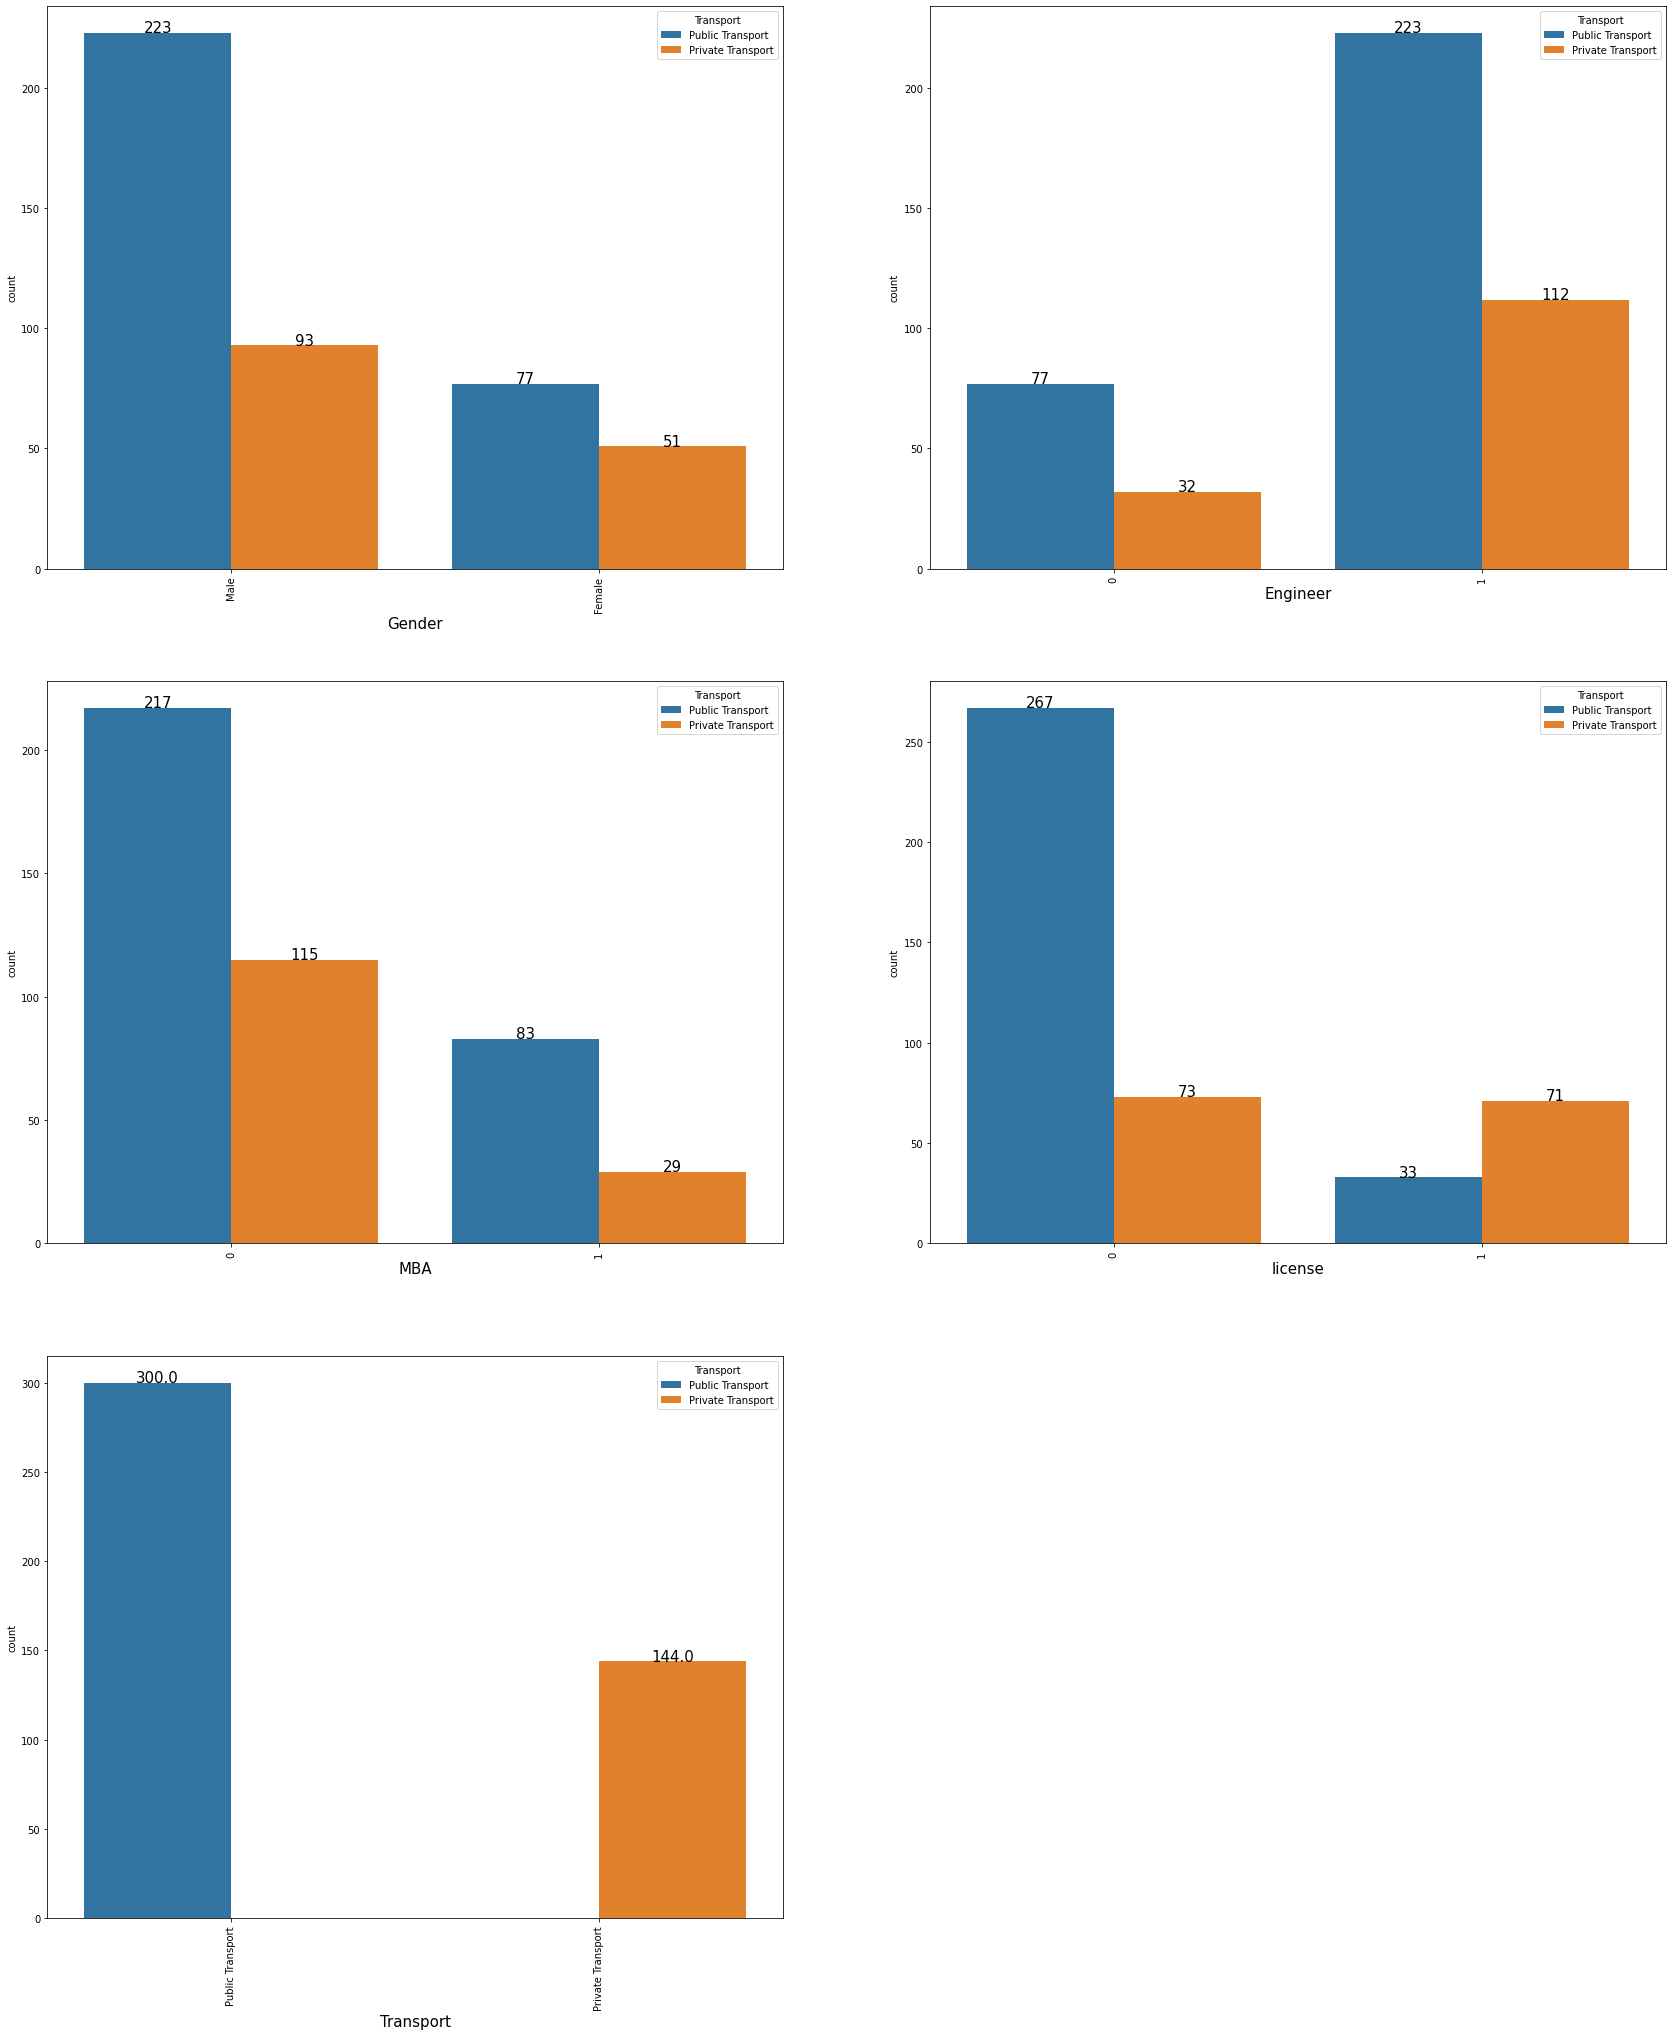

In [20]:
#Bivariate Analysis for categorical variables
l1 = len(bgl2.columns)
n = 1
fig = plt.figure(figsize=(l1*5.8,l1*12))
for col in bgl2.columns:
    plt.subplot(l1, 2, n)
    plt.xlabel(col,fontsize =15)
    plt.xticks(rotation=90)
    ax1 = sns.countplot(bgl2[col], hue=bgl['Transport'])
    n = n + 1
    for p in ax1.patches:
                ax1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center',xytext=(0, 5),textcoords='offset points', fontsize =15)

<AxesSubplot:>

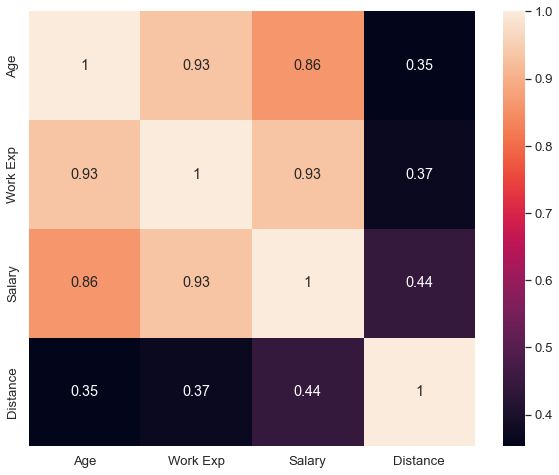

In [21]:
# construct heatmap with only continuous variables
# High correlation of 0.93 between 'Work Exp' and 'Age'
# High correlation of 0.93 between 'Salary' and 'Work Exp'
# High correlation of 0.86 between 'Salary' and 'Age'
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(bgl[['Age','Work Exp','Salary','Distance']].corr(), annot=True)

<AxesSubplot:>

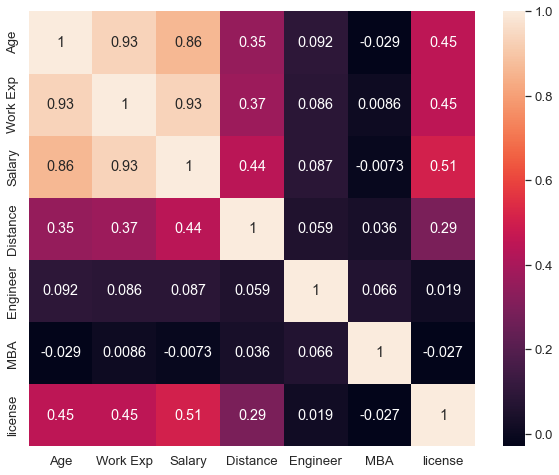

In [22]:
# construct heatmap considering only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(bgl[['Age','Work Exp','Salary','Distance','Gender','Engineer','MBA','license','Transport']].corr(), annot=True)

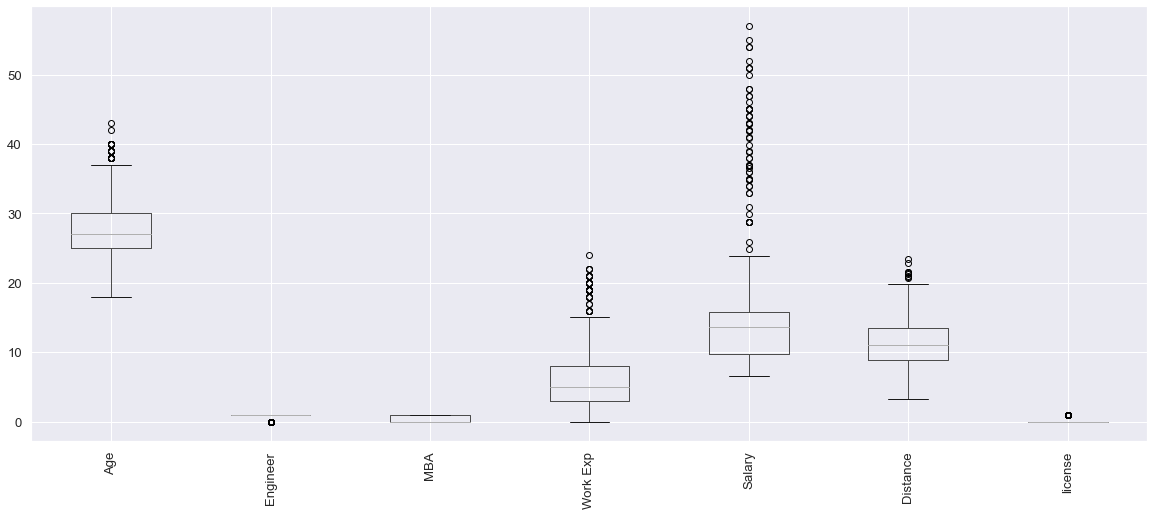

In [23]:
#Outlier Treatment
plt.figure(figsize = (20,8))
bgl.boxplot(rot = 90);

In [24]:
#Outlier function
#In the above graph we can see that all the variables have outliers. 
#We shall be treating the outliers by imputing them with the standard technique of imputing with upper quantile and lower quantile limits. 
#The upper value is calculated by Q3+(1.5 * IQR) & lower value is calculated by Q1-(1.5 * IQR). 
#After imputation the data looks like the following image.
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [25]:
for column in bgl.columns:
    if (bgl[column].dtype != 'O') :
        bgl[column] = bgl[column].astype(int)
        lr,ur = remove_outlier(bgl[column])
        bgl[column]=np.where(bgl[column]>ur,ur,bgl[column])
        bgl[column]=np.where(bgl[column]<lr,lr,bgl[column])

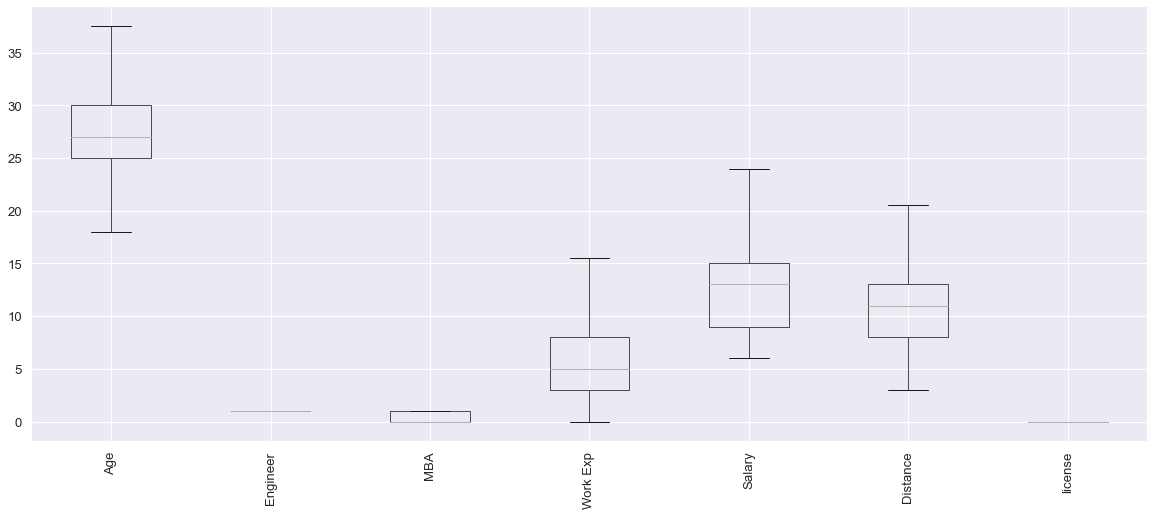

In [26]:
plt.figure(figsize = (20, 8))
bgl.boxplot(rot = 90);

In [27]:
#Next thing will be to work on variables TRANSPORT & GENDER

In [28]:
# Considering Private Transport as 0 and Public Transport as 1 Then
bgl['Transport'] = np.where(bgl['Transport']=='Public Transport','1',bgl['Transport'])
bgl['Transport'] = np.where(bgl['Transport']=='Private Transport','0',bgl['Transport'])

In [29]:
bgl.head(10)

Age  Gender  Engineer  MBA  Work Exp  Salary  Distance  license Transport
0  28.0    Male       1.0  0.0       4.0    14.0       3.0      0.0         1
1  23.0  Female       1.0  0.0       4.0     8.0       3.0      0.0         1
2  29.0    Male       1.0  0.0       7.0    13.0       4.0      0.0         1
3  28.0  Female       1.0  1.0       5.0    13.0       4.0      0.0         1
4  27.0    Male       1.0  0.0       4.0    13.0       4.0      0.0         1
5  26.0    Male       1.0  0.0       4.0    12.0       4.0      0.0         1
6  28.0    Male       1.0  0.0       5.0    14.0       5.0      0.0         0
7  26.0  Female       1.0  0.0       3.0    10.0       5.0      0.0         1
8  22.0    Male       1.0  0.0       1.0     7.0       5.0      0.0         1
9  27.0    Male       1.0  0.0       4.0    13.0       5.0      0.0         1

In [30]:
bgl = pd.get_dummies(bgl, columns = ['Gender'])

In [31]:
bgl.head()

Age  Engineer  MBA  Work Exp  Salary  Distance  license Transport  \
0  28.0       1.0  0.0       4.0    14.0       3.0      0.0         1   
1  23.0       1.0  0.0       4.0     8.0       3.0      0.0         1   
2  29.0       1.0  0.0       7.0    13.0       4.0      0.0         1   
3  28.0       1.0  1.0       5.0    13.0       4.0      0.0         1   
4  27.0       1.0  0.0       4.0    13.0       4.0      0.0         1   

   Gender_Female  Gender_Male  
0              0            1  
1              1            0  
2              0            1  
3              1            0  
4              0            1

In [32]:
bgl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            444 non-null    float64
 1   Engineer       444 non-null    float64
 2   MBA            444 non-null    float64
 3   Work Exp       444 non-null    float64
 4   Salary         444 non-null    float64
 5   Distance       444 non-null    float64
 6   license        444 non-null    float64
 7   Transport      444 non-null    object 
 8   Gender_Female  444 non-null    uint8  
 9   Gender_Male    444 non-null    uint8  
dtypes: float64(7), object(1), uint8(2)
memory usage: 28.7+ KB


In [33]:
bgl['Transport'] = bgl['Transport'].astype('float64')
bgl['Gender_Female'] = bgl['Gender_Female'].astype('float64')
bgl['Gender_Male'] = bgl['Gender_Male'].astype('float64')

## Model Building

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score , roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [35]:
#The data is divided in to two different datasets where y contains the info on mode of transport & other on remaining data
y = bgl['Transport']
X = bgl.drop('Transport',axis=1)

### Logistic Regression Model

In [36]:
#The split done is of 70: 30 ratio. 70% is Train & 30% is Test data
from sklearn.linear_model import LogisticRegression
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size=0.3, random_state=42)
model_LR = LogisticRegression()
model_LR.fit(X_train_LR, y_train_LR)

LogisticRegression()

In [37]:
print('The model score for Logistic Regression Training set is',model_LR.score(X_train_LR,y_train_LR))
print('\n')
print('The model score for Logistic Regression Testing set is',model_LR.score(X_test_LR,y_test_LR))

The model score for Logistic Regression Training set is 0.7548387096774194


The model score for Logistic Regression Testing set is 0.753731343283582


In [38]:
y_train_pred_LR = model_LR.predict(X_train_LR)
y_test_pred_LR = model_LR.predict(X_test_LR)

### Logistic Regression Model Training Set

The classification report & Confution matrix for Logistic Regression training set is
               precision    recall  f1-score   support

         0.0       0.68      0.40      0.50        96
         1.0       0.77      0.92      0.84       214

    accuracy                           0.75       310
   macro avg       0.73      0.66      0.67       310
weighted avg       0.74      0.75      0.73       310



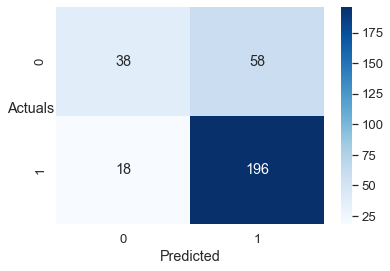

In [39]:
sns.heatmap((confusion_matrix(y_train_LR,y_train_pred_LR)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print('The classification report & Confution matrix for Logistic Regression training set is\n',classification_report(y_train_LR, y_train_pred_LR))

The AUC score for Logistic Regression Training dataset is: 0.7544


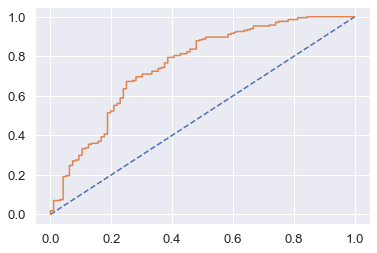

In [40]:
probs_LR_train = model_LR.predict_proba(X_train_LR)
probs_LR_train = probs_LR_train[:,1]
auc_train = roc_auc_score(y_train_LR, probs_LR_train)
print('The AUC score for Logistic Regression Training dataset is: %.4f'%auc_train)
train_fpr_LR, train_tpr_LR, train_thresholds_LR = roc_curve(y_train_LR, probs_LR_train);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(train_fpr_LR, train_tpr_LR);

### Logistic Regression Model Test Set

The Classification Report & Confusion Matrix for Logistic Regression testing set is
               precision    recall  f1-score   support

         0.0       0.73      0.50      0.59        48
         1.0       0.76      0.90      0.82        86

    accuracy                           0.75       134
   macro avg       0.74      0.70      0.71       134
weighted avg       0.75      0.75      0.74       134



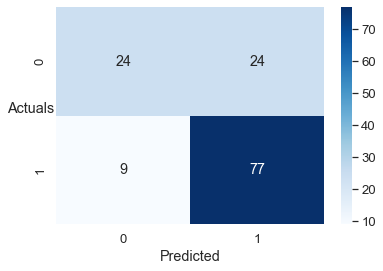

In [41]:
print('The Classification Report & Confusion Matrix for Logistic Regression testing set is\n',classification_report(y_test_LR, y_test_pred_LR))
sns.heatmap((confusion_matrix(y_test_LR,y_test_pred_LR)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

The AUC score for Logistic Regression testing set is: 0.8331


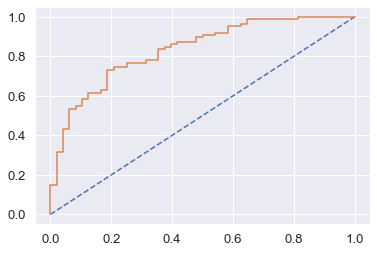

In [42]:
probs_LR_test = model_LR.predict_proba(X_test_LR)
probs_LR_test = probs_LR_test[:,1]
auc_test = roc_auc_score(y_test_LR, probs_LR_test)
print('The AUC score for Logistic Regression testing set is: %.4f'%auc_test)
test_fpr_LR, test_tpr_LR, test_thresholds_LR = roc_curve(y_test_LR, probs_LR_test);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(test_fpr_LR, test_tpr_LR);

### Linear Discriminant Analysis

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_train_LDA, X_test_LDA, y_train_LDA, y_test_LDA = train_test_split(X, y, test_size=0.3, random_state=42)
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X_train_LDA, y_train_LDA)

LinearDiscriminantAnalysis()

In [44]:
print('The model score for Linear Discriminant Analysis training set is',model_LDA.score(X_train_LDA, y_train_LDA))
print('\n')
print('The model score for Linear Discriminant Analysis testing set is',model_LDA.score(X_test_LDA, y_test_LDA))

The model score for Linear Discriminant Analysis training set is 0.7612903225806451


The model score for Linear Discriminant Analysis testing set is 0.753731343283582


In [45]:
y_train_pred_LDA = model_LDA.predict(X_train_LDA)
y_test_pred_LDA = model_LDA.predict(X_test_LDA)

### Linear Discriminant Analysis Training Set

The classification report for Linear Discriminant Analysis training set is
               precision    recall  f1-score   support

         0.0       0.69      0.42      0.52        96
         1.0       0.78      0.92      0.84       214

    accuracy                           0.76       310
   macro avg       0.73      0.67      0.68       310
weighted avg       0.75      0.76      0.74       310



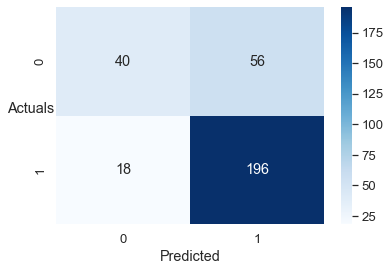

In [46]:
print('The classification report for Linear Discriminant Analysis training set is\n',classification_report(y_train_LDA, y_train_pred_LDA))
sns.heatmap((confusion_matrix(y_train_LDA,y_train_pred_LDA)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

The AUC score for Linear Discriminant Analysis training set is: 0.754


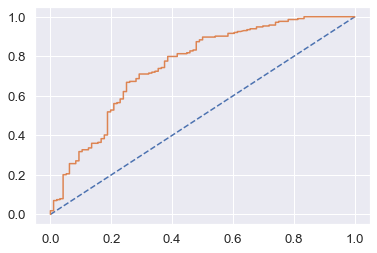

In [47]:
probs_LDA_train = model_LDA.predict_proba(X_train_LDA)
probs_LDA_train = probs_LDA_train[:,1]
auc_train_LDA = roc_auc_score(y_train_LDA, probs_LDA_train)
print('The AUC score for Linear Discriminant Analysis training set is: %.3f'%auc_train_LDA)

train_fpr_LDA, train_tpr_LDA, train_thresholds_LDA = roc_curve(y_train_LDA, probs_LDA_train);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(train_fpr_LDA, train_tpr_LDA);

### Linear Discriminant Analysis Test Set

The classification report for Linear Discriminant Analysis testing set is
               precision    recall  f1-score   support

         0.0       0.73      0.50      0.59        48
         1.0       0.76      0.90      0.82        86

    accuracy                           0.75       134
   macro avg       0.74      0.70      0.71       134
weighted avg       0.75      0.75      0.74       134



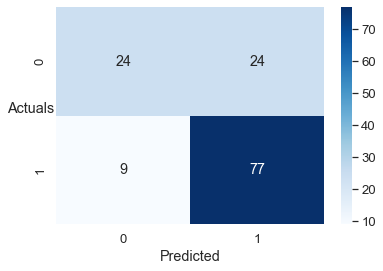

In [48]:
print('The classification report for Linear Discriminant Analysis testing set is\n',classification_report(y_test_LDA, y_test_pred_LDA))
sns.heatmap((confusion_matrix(y_test_LDA,y_test_pred_LDA)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

The AUC score for Linear Discriminant Analysis testing set is: 0.834


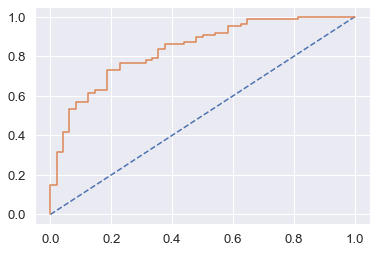

In [49]:
probs_LDA_test = model_LDA.predict_proba(X_test_LDA)
probs_LDA_test = probs_LDA_test[:,1]
auc_test_LDA = roc_auc_score(y_test_LDA, probs_LDA_test)

print('The AUC score for Linear Discriminant Analysis testing set is: %.3f'%auc_test_LDA)
test_fpr_LDA, test_tpr_LDA, test_thresholds_LDA = roc_curve(y_test_LDA, probs_LDA_test);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(test_fpr_LDA, test_tpr_LDA);

### Decision Tree Classifier – CART model

In [50]:
from sklearn.tree import DecisionTreeClassifier
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X, y, test_size=0.3, random_state=42)
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_DT, y_train_DT)

DecisionTreeClassifier()

In [51]:
print('The model score for Decision Tree Classifier training set is',model_DT.score(X_train_DT,y_train_DT))
print('\n')
print('The model score for Decision Tree Classifier testing set is',model_DT.score(X_test_DT,y_test_DT))

The model score for Decision Tree Classifier training set is 0.9967741935483871


The model score for Decision Tree Classifier testing set is 0.7089552238805971


In [52]:
y_train_pred_DT = model_DT.predict(X_train_DT)
y_test_pred_DT = model_DT.predict(X_test_DT)

### Decision Tree Classifier - CART Model Training Set

The classification report for Decision Tree training set is
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        96
         1.0       1.00      1.00      1.00       214

    accuracy                           1.00       310
   macro avg       0.99      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



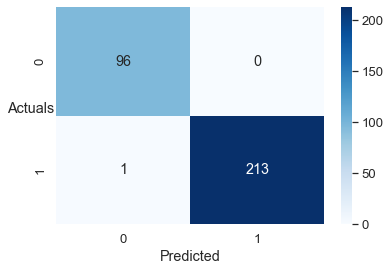

In [53]:
print('The classification report for Decision Tree training set is\n',classification_report(y_train_DT, y_train_pred_DT))
sns.heatmap((confusion_matrix(y_train_DT,y_train_pred_DT)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

The AUC score for Decision Tree training set is: 1.000


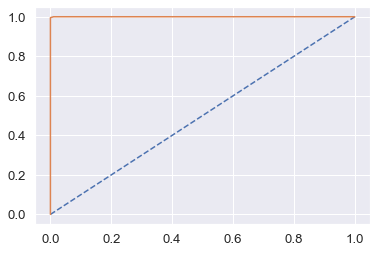

In [54]:
probs_DT_train = model_DT.predict_proba(X_train_DT)
probs_DT_train = probs_DT_train[:,1]
auc_train_DT = roc_auc_score(y_train_DT, probs_DT_train)
print('The AUC score for Decision Tree training set is: %.3f'%auc_train_DT)
train_fpr_DT, train_tpr_DT, train_thresholds_DT = roc_curve(y_train_DT, probs_DT_train);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(train_fpr_DT, train_tpr_DT);

### Decision Tree Classifier - CART Model Test Set

The classification report for Decision Tree testing set is
               precision    recall  f1-score   support

         0.0       0.56      0.83      0.67        48
         1.0       0.87      0.64      0.74        86

    accuracy                           0.71       134
   macro avg       0.72      0.74      0.71       134
weighted avg       0.76      0.71      0.71       134



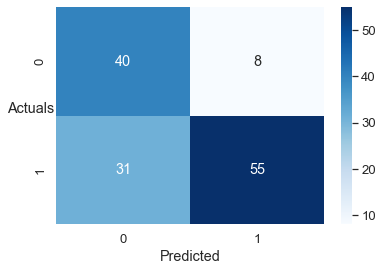

In [55]:
print('The classification report for Decision Tree testing set is\n',classification_report(y_test_DT, y_test_pred_DT))
sns.heatmap((confusion_matrix(y_test_DT,y_test_pred_DT)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

The AUC score for Decision Tree testing set is: 0.746


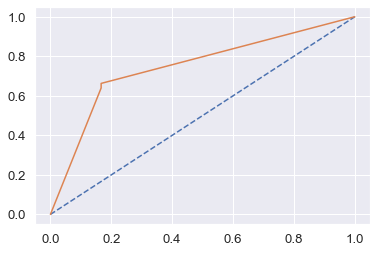

In [56]:
probs_DT_test = model_DT.predict_proba(X_test_DT)
probs_DT_test = probs_DT_test[:,1]
auc_test_DT = roc_auc_score(y_test_DT, probs_DT_test)
print('The AUC score for Decision Tree testing set is: %.3f'%auc_test_DT)
test_fpr_DT, test_tpr_DT, test_thresholds_DT = roc_curve(y_test_DT, probs_DT_test);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(test_fpr_DT, test_tpr_DT);

### Naïve Bayes Model

In [57]:
from sklearn.naive_bayes import GaussianNB
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(X, y, test_size=0.30, random_state=42)
model_NB = GaussianNB()
model_NB.fit(X_train_NB, y_train_NB)

GaussianNB()

In [58]:
print('The model score for Naive Bayes Model training set is',model_NB.score(X_train_NB,y_train_NB))
print('\n')
print('The model score for Naive Bayes Model testing set is',model_NB.score(X_test_NB, y_test_NB))

The model score for Naive Bayes Model training set is 0.7806451612903226


The model score for Naive Bayes Model testing set is 0.7835820895522388


In [59]:
y_train_pred_NB = model_NB.predict(X_train_NB)
y_test_pred_NB = model_NB.predict(X_test_NB)

### Naïve Bayes Model Training Set

The classification report for Naive Bayes Model set is
               precision    recall  f1-score   support

         0.0       0.71      0.49      0.58        96
         1.0       0.80      0.91      0.85       214

    accuracy                           0.78       310
   macro avg       0.76      0.70      0.72       310
weighted avg       0.77      0.78      0.77       310



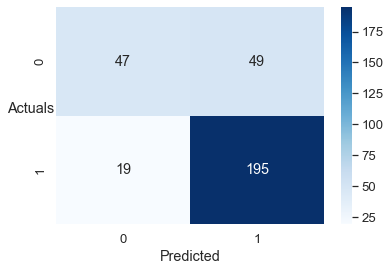

In [60]:
print('The classification report for Naive Bayes Model set is\n',classification_report(y_train_NB, y_train_pred_NB))
sns.heatmap((confusion_matrix(y_train_NB,y_train_pred_NB)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

The AUC score for Naive Bayes training set is: 0.788


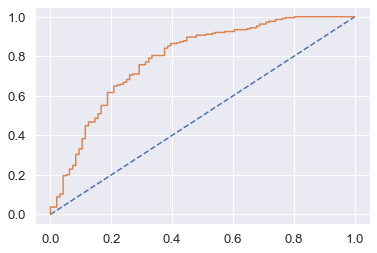

In [61]:
probs_NB_train = model_NB.predict_proba(X_train_NB)
probs_NB_train = probs_NB_train[:,1]
auc_train_NB = roc_auc_score(y_train_NB, probs_NB_train)
print('The AUC score for Naive Bayes training set is: %.3f'%auc_train_NB)
train_fpr_NB, train_tpr_NB, train_thresholds_NB = roc_curve(y_train_NB, probs_NB_train);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(train_fpr_NB, train_tpr_NB);

### Naïve Bayes Model Test Set

The classification report for Naive bayes Model testing set is
               precision    recall  f1-score   support

         0.0       0.76      0.58      0.66        48
         1.0       0.79      0.90      0.84        86

    accuracy                           0.78       134
   macro avg       0.78      0.74      0.75       134
weighted avg       0.78      0.78      0.78       134



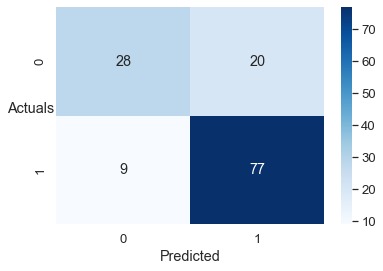

In [62]:
print('The classification report for Naive bayes Model testing set is\n',classification_report(y_test_NB, y_test_pred_NB))
sns.heatmap((confusion_matrix(y_test_NB,y_test_pred_NB)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

The AUC score for Naive Bayes testing set is: 0.838


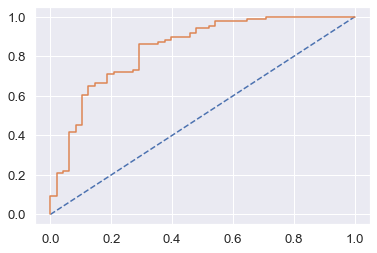

In [63]:
probs_NB_test = model_NB.predict_proba(X_test_NB)
probs_NB_test = probs_NB_test[:,1]
auc_test_NB = roc_auc_score(y_test_NB, probs_NB_test)
print('The AUC score for Naive Bayes testing set is: %.3f'%auc_test_NB)
test_fpr_NB, test_tpr_NB, test_thresholds_NB = roc_curve(y_test_NB, probs_NB_test);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(test_fpr_NB, test_tpr_NB);

### KNN Model

In [64]:
from sklearn.neighbors import KNeighborsClassifier
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X, y, test_size=0.30, random_state=42)
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_KNN, y_train_KNN)

KNeighborsClassifier()

In [65]:
print('The model score for KNN training set is',model_KNN.score(X_train_KNN, y_train_KNN))
print('\n')
print('The model score for KNN testing set is',model_KNN.score(X_test_KNN, y_test_KNN))

The model score for KNN training set is 0.8225806451612904


The model score for KNN testing set is 0.8283582089552238


In [66]:
y_train_pred_KNN = model_KNN.predict(X_train_KNN)
y_test_pred_KNN = model_KNN.predict(X_test_KNN)

### KNN Training Set

The classification report for KNN set is
               precision    recall  f1-score   support

         0.0       0.81      0.56      0.66        96
         1.0       0.83      0.94      0.88       214

    accuracy                           0.82       310
   macro avg       0.82      0.75      0.77       310
weighted avg       0.82      0.82      0.81       310



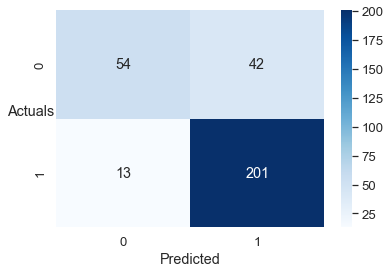

In [67]:
print('The classification report for KNN set is\n',classification_report(y_train_KNN, y_train_pred_KNN))
sns.heatmap((confusion_matrix(y_train_KNN,y_train_pred_KNN)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

The AUC score for KNN training set is: 0.902


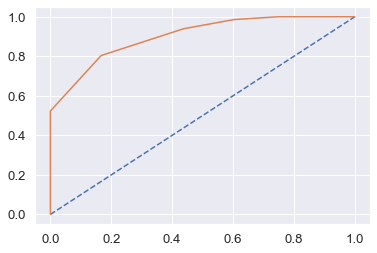

In [68]:
probs_KNN_train = model_KNN.predict_proba(X_train_KNN)
probs_KNN_train = probs_KNN_train[:,1]
auc_train_KNN = roc_auc_score(y_train_KNN, probs_KNN_train)
print('The AUC score for KNN training set is: %.3f'%auc_train_KNN)
train_fpr_KNN, train_tpr_KNN, train_thresholds_KNN = roc_curve(y_train_KNN, probs_KNN_train);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(train_fpr_KNN, train_tpr_KNN);

### KNN Test Set

The classification report for KNN testing set is
               precision    recall  f1-score   support

         0.0       0.79      0.71      0.75        48
         1.0       0.85      0.90      0.87        86

    accuracy                           0.83       134
   macro avg       0.82      0.80      0.81       134
weighted avg       0.83      0.83      0.83       134



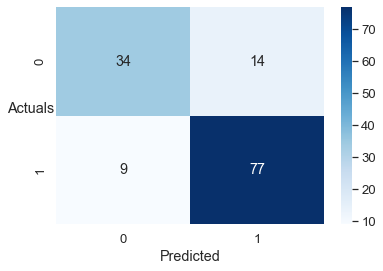

In [69]:
print('The classification report for KNN testing set is\n',classification_report(y_test_KNN, y_test_pred_KNN))
sns.heatmap((confusion_matrix(y_test_KNN,y_test_pred_KNN)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

The AUC score for KNN testing set is: 0.837


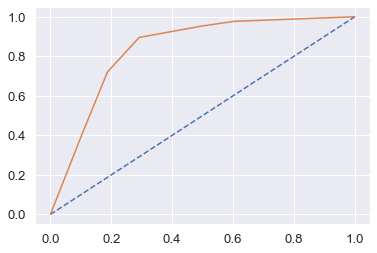

In [70]:
probs_KNN_test = model_KNN.predict_proba(X_test_KNN)
probs_KNN_test = probs_KNN_test[:,1]
auc_test_KNN = roc_auc_score(y_test_KNN, probs_KNN_test)
print('The AUC score for KNN testing set is: %.3f'%auc_test_KNN)
test_fpr_KNN, test_tpr_KNN, test_thresholds_KNN = roc_curve(y_test_KNN, probs_KNN_test);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(test_fpr_KNN, test_tpr_KNN);

### Random Forest Model

In [71]:
from sklearn.ensemble import RandomForestClassifier
X_train_RFC, X_test_RFC, y_train_RFC, y_test_RFC = train_test_split(X, y, test_size=0.3, random_state=42)
rfcl = RandomForestClassifier()
rfcl = rfcl.fit(X_train_RFC, y_train_RFC)

In [72]:
print('The model score for Random Forest Classifier training set is',rfcl.score(X_train_RFC,y_train_RFC))
print('\n')
print('The model score for Random Forest Classifier testing set is',rfcl.score(X_test_RFC,y_test_RFC))

The model score for Random Forest Classifier training set is 0.9967741935483871


The model score for Random Forest Classifier testing set is 0.8432835820895522


In [73]:
y_train_pred_RFC = rfcl.predict(X_train_RFC)
y_test_pred_RFC = rfcl.predict(X_test_RFC)

### Random Forest Classifier on Training Set

The classification report for RFC training set is
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        96
         1.0       1.00      1.00      1.00       214

    accuracy                           1.00       310
   macro avg       1.00      0.99      1.00       310
weighted avg       1.00      1.00      1.00       310



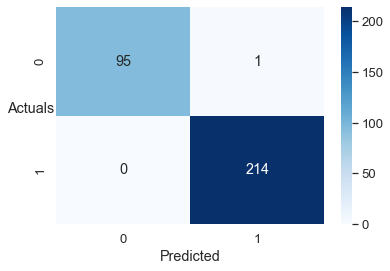

In [74]:
print('The classification report for RFC training set is\n',classification_report(y_train_RFC, y_train_pred_RFC))
sns.heatmap((confusion_matrix(y_train_RFC,y_train_pred_RFC)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

The AUC score for RFC training set is: 1.000


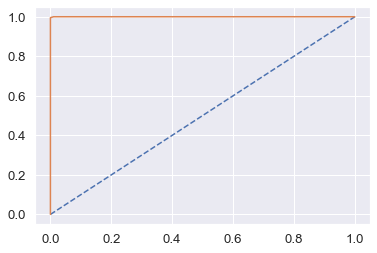

In [75]:
probs_RFC_train = rfcl.predict_proba(X_train_RFC)
probs_RFC_train = probs_RFC_train[:,1]
auc_train_RFC = roc_auc_score(y_train_RFC, probs_RFC_train)
print('The AUC score for RFC training set is: %.3f'%auc_train_RFC)
train_fpr_RFC, train_tpr_RFC, train_thresholds_RFC = roc_curve(y_train_RFC, probs_RFC_train);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(train_fpr_RFC, train_tpr_RFC);

### Random Forest Classifier on Test Set

The classification report for RFC testing set is
               precision    recall  f1-score   support

         0.0       0.80      0.75      0.77        48
         1.0       0.87      0.90      0.88        86

    accuracy                           0.84       134
   macro avg       0.83      0.82      0.83       134
weighted avg       0.84      0.84      0.84       134



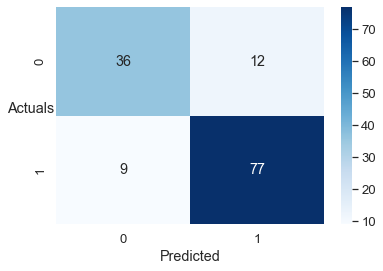

In [76]:
print('The classification report for RFC testing set is\n',classification_report(y_test_RFC, y_test_pred_RFC))
sns.heatmap((confusion_matrix(y_test_RFC,y_test_pred_RFC)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

The AUC score for RFC testing set is: 0.859


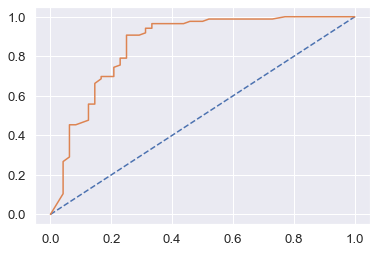

In [77]:
probs_RFC_test = rfcl.predict_proba(X_test_RFC)
probs_RFC_test = probs_RFC_test[:,1]
auc_test_RFC = roc_auc_score(y_test_RFC, probs_RFC_test)
print('The AUC score for RFC testing set is: %.3f'%auc_test_RFC)
test_fpr_RFC, test_tpr_RFC, test_thresholds_RFC = roc_curve(y_test_RFC, probs_RFC_test);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(test_fpr_RFC, test_tpr_RFC);

# Model Tuning

### Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
X_train_gdb, X_test_gdb, y_train_gdb, y_test_gdb = train_test_split(X, y, test_size=0.3, random_state=42)
gbcl = GradientBoostingClassifier(n_estimators=50,random_state=1)
gbcl = gbcl.fit(X_train_gdb, y_train_gdb)

In [79]:
print('The model score for GradientBoosting training set is',gbcl.score(X_train_gdb,y_train_gdb))
print('\n')
print('The model score for GradientBoosting testing set is',gbcl.score(X_test_gdb,y_test_gdb))

The model score for GradientBoosting training set is 0.8741935483870967


The model score for GradientBoosting testing set is 0.7761194029850746


In [80]:
y_train_pred_gdb = gbcl.predict(X_train_gdb)
y_test_pred_gdb = gbcl.predict(X_test_gdb)

### Gradient Boosting on Training Set

The classification report for Gradientboosting training set is
               precision    recall  f1-score   support

         0.0       0.89      0.68      0.77        96
         1.0       0.87      0.96      0.91       214

    accuracy                           0.87       310
   macro avg       0.88      0.82      0.84       310
weighted avg       0.88      0.87      0.87       310



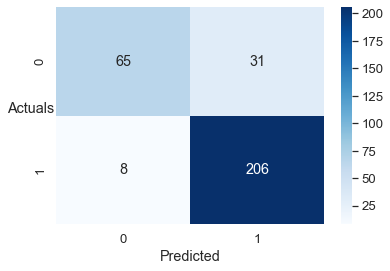

In [81]:
print('The classification report for Gradientboosting training set is\n',classification_report(y_train_gdb, y_train_pred_gdb))
sns.heatmap((confusion_matrix(y_train_gdb,y_train_pred_gdb)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

The AUC score for GradientBoosting training set is: 0.947


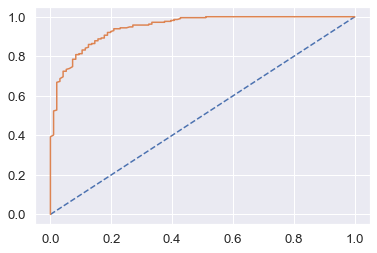

In [82]:
probs_gdb_train = gbcl.predict_proba(X_train_gdb)
probs_gdb_train = probs_gdb_train[:,1]
auc_train_gdb = roc_auc_score(y_train_gdb, probs_gdb_train)
print('The AUC score for GradientBoosting training set is: %.3f'%auc_train_gdb)
train_fpr_gdb, train_tpr_gdb, train_thresholds_gdb = roc_curve(y_train_gdb, probs_gdb_train);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(train_fpr_gdb, train_tpr_gdb);

### Gradient Boosting on Test Set

The classification report for Gradientboosting testing set is
               precision    recall  f1-score   support

         0.0       0.74      0.58      0.65        48
         1.0       0.79      0.88      0.84        86

    accuracy                           0.78       134
   macro avg       0.76      0.73      0.74       134
weighted avg       0.77      0.78      0.77       134



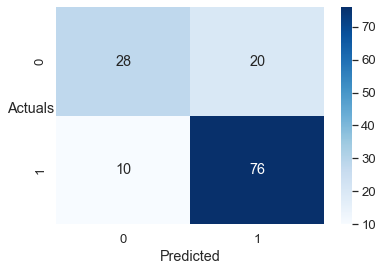

In [83]:
print('The classification report for Gradientboosting testing set is\n',classification_report(y_test_gdb, y_test_pred_gdb))
sns.heatmap((confusion_matrix(y_test_gdb,y_test_pred_gdb)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

The AUC score for GradientBoosting testing set is: 0.846


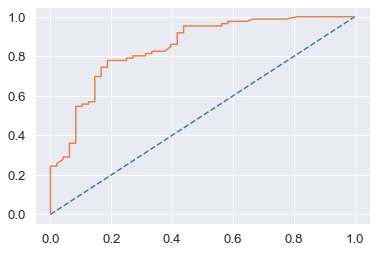

In [84]:
probs_gdb_test = gbcl.predict_proba(X_test_gdb)
probs_gdb_test = probs_gdb_test[:,1]
auc_test_gdb = roc_auc_score(y_test_gdb, probs_gdb_test)
print('The AUC score for GradientBoosting testing set is: %.3f'%auc_test_gdb)
test_fpr_gdb, test_tpr_gdb, test_thresholds_gdb = roc_curve(y_test_gdb, probs_gdb_test);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(test_fpr_gdb, test_tpr_gdb);

In [85]:
LR_Train_class = classification_report(y_train_LR, y_train_pred_LR , output_dict=True)
df_LR_Train = pd.DataFrame(LR_Train_class).transpose()
LR_Train_precision = round(df_LR_Train.loc['1.0'][0] , 3)
LR_Train_recall = round(df_LR_Train.loc['1.0'][1] , 3)
LR_Train_F1score = round(df_LR_Train.loc['1.0'][2] , 3)
LR_Train_Accuracy = round(df_LR_Train.loc['accuracy'][0], 3)
LR_Train_auc_score = round(auc_train , 3)

In [86]:
LR_Test_class = classification_report(y_test_LR, y_test_pred_LR , output_dict=True)
df_LR_Test = pd.DataFrame(LR_Test_class).transpose()
LR_Test_precision = round(df_LR_Test.loc['1.0'][0] , 3)
LR_Test_recall = round(df_LR_Test.loc['1.0'][1] , 3)
LR_Test_F1score = round(df_LR_Test.loc['1.0'][2] , 3)
LR_Test_Accuracy = round(df_LR_Test.loc['accuracy'][0], 3)
LR_Test_auc_score = round(auc_test , 3)

In [87]:
LDA_Train_class = classification_report(y_train_LDA, y_train_pred_LDA , output_dict=True)
df_LDA_Train = pd.DataFrame(LDA_Train_class).transpose()
LDA_Train_precision = round(df_LDA_Train.loc['1.0'][0] , 3)
LDA_Train_recall = round(df_LDA_Train.loc['1.0'][1] , 3)
LDA_Train_F1score = round(df_LDA_Train.loc['1.0'][2] , 3)
LDA_Train_Accuracy = round(df_LDA_Train.loc['accuracy'][0], 3)
LDA_Train_auc_score = round(auc_train_LDA , 3)

In [88]:
LDA_Test_class = classification_report(y_test_LDA, y_test_pred_LDA , output_dict=True)
df_LDA_Test = pd.DataFrame(LDA_Test_class).transpose()
LDA_Test_precision = round(df_LDA_Test.loc['1.0'][0] , 3)
LDA_Test_recall = round(df_LDA_Test.loc['1.0'][1] , 3)
LDA_Test_F1score = round(df_LDA_Test.loc['1.0'][2] , 3)
LDA_Test_Accuracy = round(df_LDA_Test.loc['accuracy'][0], 3)
LDA_Test_auc_score = round(auc_test_LDA , 3)

In [89]:
DT_Train_class = classification_report(y_train_DT, y_train_pred_DT , output_dict=True)
df_DT_Train = pd.DataFrame(DT_Train_class).transpose()
DT_Train_precision = round(df_DT_Train.loc['1.0'][0] , 3)
DT_Train_recall = round(df_DT_Train.loc['1.0'][1] , 3)
DT_Train_F1score = round(df_DT_Train.loc['1.0'][2] , 3)
DT_Train_Accuracy = round(df_DT_Train.loc['accuracy'][0], 3)
DT_Train_auc_score = round(auc_train_DT, 3)

In [90]:
DT_Test_class = classification_report(y_test_DT, y_test_pred_DT , output_dict=True)
df_DT_Test = pd.DataFrame(DT_Test_class).transpose()
DT_Test_precision = round(df_DT_Test.loc['1.0'][0] , 3)
DT_Test_recall = round(df_DT_Test.loc['1.0'][1] , 3)
DT_Test_F1score = round(df_DT_Test.loc['1.0'][2] , 3)
DT_Test_Accuracy = round(df_DT_Test.loc['accuracy'][0], 3)
DT_Test_auc_score = round(auc_test_DT, 3)

In [91]:
NB_Train_class = classification_report(y_train_NB, y_train_pred_NB , output_dict=True)
df_NB_Train = pd.DataFrame(NB_Train_class).transpose()
NB_Train_precision = round(df_NB_Train.loc['1.0'][0] , 3)
NB_Train_recall = round(df_NB_Train.loc['1.0'][1] , 3)
NB_Train_F1score = round(df_NB_Train.loc['1.0'][2] , 3)
NB_Train_Accuracy = round(df_NB_Train.loc['accuracy'][0], 3)
NB_Train_auc_score = round(auc_train_NB , 3)

In [92]:
NB_Test_class = classification_report(y_test_NB, y_test_pred_NB , output_dict=True)
df_NB_Test = pd.DataFrame(NB_Test_class).transpose()
NB_Test_precision = round(df_NB_Test.loc['1.0'][0] , 3)
NB_Test_recall = round(df_NB_Test.loc['1.0'][1] , 3)
NB_Test_F1score = round(df_NB_Test.loc['1.0'][2] , 3)
NB_Test_Accuracy = round(df_NB_Test.loc['accuracy'][0], 3)
NB_Test_auc_score = round(auc_test_NB , 3)

In [93]:
KNN_Train_class = classification_report(y_train_KNN, y_train_pred_KNN , output_dict=True)
df_KNN_Train = pd.DataFrame(KNN_Train_class).transpose()
KNN_Train_precision = round(df_KNN_Train.loc['1.0'][0] , 3)
KNN_Train_recall = round(df_KNN_Train.loc['1.0'][1] , 3)
KNN_Train_F1score = round(df_KNN_Train.loc['1.0'][2] , 3)
KNN_Train_Accuracy = round(df_KNN_Train.loc['accuracy'][0], 3)
KNN_Train_auc_score = round(auc_train_KNN , 3)

In [94]:
KNN_Test_class = classification_report(y_test_KNN, y_test_pred_KNN , output_dict=True)
df_KNN_Test = pd.DataFrame(KNN_Test_class).transpose()
KNN_Test_precision = round(df_KNN_Test.loc['1.0'][0] , 3)
KNN_Test_recall = round(df_KNN_Test.loc['1.0'][1] , 3)
KNN_Test_F1score = round(df_KNN_Test.loc['1.0'][2] , 3)
KNN_Test_Accuracy = round(df_KNN_Test.loc['accuracy'][0], 3)
KNN_Test_auc_score = round(auc_test_KNN , 3)

In [95]:
RFC_Train_class = classification_report(y_train_RFC, y_train_pred_RFC , output_dict=True)
df_RFC_Train = pd.DataFrame(RFC_Train_class).transpose()
RFC_Train_precision = round(df_RFC_Train.loc['1.0'][0] , 3)
RFC_Train_recall = round(df_RFC_Train.loc['1.0'][1] , 3)
RFC_Train_F1score = round(df_RFC_Train.loc['1.0'][2] , 3)
RFC_Train_Accuracy = round(df_RFC_Train.loc['accuracy'][0], 3)
RFC_Train_auc_score = round(auc_train_RFC, 3)

In [96]:
RFC_Test_class = classification_report(y_test_RFC, y_test_pred_RFC , output_dict=True)
df_RFC_Test = pd.DataFrame(RFC_Test_class).transpose()
RFC_Test_precision = round(df_RFC_Test.loc['1.0'][0] , 3)
RFC_Test_recall = round(df_RFC_Test.loc['1.0'][1] , 3)
RFC_Test_F1score = round(df_RFC_Test.loc['1.0'][2] , 3)
RFC_Test_Accuracy = round(df_RFC_Test.loc['accuracy'][0], 3)
RFC_Test_auc_score = round(auc_test_RFC, 3)

In [97]:
gdb_Train_class = classification_report(y_train_gdb, y_train_pred_gdb , output_dict=True)
df_gdb_Train = pd.DataFrame(gdb_Train_class).transpose()
gdb_Train_precision = round(df_gdb_Train.loc['1.0'][0] , 3)
gdb_Train_recall = round(df_gdb_Train.loc['1.0'][1] , 3)
gdb_Train_F1score = round(df_gdb_Train.loc['1.0'][2] , 3)
gdb_Train_Accuracy = round(df_gdb_Train.loc['accuracy'][0], 3)
gdb_Train_auc_score = round(auc_train_gdb, 3)

In [98]:
gdb_Test_class = classification_report(y_test_gdb, y_test_pred_gdb , output_dict=True)
df_gdb_Test = pd.DataFrame(gdb_Test_class).transpose()
gdb_Test_precision = round(df_gdb_Test.loc['1.0'][0] , 3)
gdb_Test_recall = round(df_gdb_Test.loc['1.0'][1] , 3)
gdb_Test_F1score = round(df_gdb_Test.loc['1.0'][2] , 3)
gdb_Test_Accuracy = round(df_gdb_Test.loc['accuracy'][0], 3)
gdb_Test_auc_score = round(auc_test_gdb, 3)

In [99]:
pd.set_option('display.max_columns', None)
index = ['Precision','Recall','F1 Score','Accuracy','AUC Score']
pd.DataFrame({'LR Train' :[LR_Train_precision , LR_Train_recall ,LR_Train_F1score, LR_Train_Accuracy, LR_Train_auc_score],
'LR Test':[LR_Test_precision, LR_Test_recall, LR_Test_F1score, LR_Test_Accuracy,LR_Test_auc_score],
'LDA Train' :[LDA_Train_precision, LDA_Train_recall, LDA_Train_F1score, LDA_Train_Accuracy, LDA_Train_auc_score],
'LDA Test' :[LDA_Test_precision,LDA_Test_recall,LDA_Test_F1score,LDA_Test_Accuracy,LDA_Test_auc_score],
'DT-CART Train':[DT_Train_precision , DT_Train_recall ,DT_Train_F1score, DT_Train_Accuracy, DT_Train_auc_score],
'DT-CART Test':[DT_Test_precision, DT_Test_recall, DT_Test_F1score, DT_Test_Accuracy,DT_Test_auc_score],
'NB Train' :[NB_Train_precision, NB_Train_recall, NB_Train_F1score, NB_Train_Accuracy, NB_Train_auc_score],
'NB Test' :[NB_Test_precision, NB_Test_recall, NB_Test_F1score, NB_Test_Accuracy, NB_Test_auc_score],
'KNN Train' :[KNN_Train_precision, KNN_Train_recall ,KNN_Train_F1score, KNN_Train_Accuracy, KNN_Train_auc_score],
'KNN Test':[KNN_Test_precision, KNN_Test_recall, KNN_Test_F1score, KNN_Test_Accuracy,KNN_Test_auc_score],
'RFC Train':[RFC_Train_precision , RFC_Train_recall ,RFC_Train_F1score, RFC_Train_Accuracy, RFC_Train_auc_score],
'RFC Test':[RFC_Test_precision, RFC_Test_recall, RFC_Test_F1score, RFC_Test_Accuracy,RFC_Test_auc_score],
'Gradient Boosting Train':[gdb_Train_precision, gdb_Train_recall, gdb_Train_F1score, gdb_Train_Accuracy, gdb_Train_auc_score],
'Gradient Boosting Test':[gdb_Test_precision,gdb_Test_recall,gdb_Test_F1score,gdb_Test_Accuracy,gdb_Test_auc_score],},index= index)

LR Train  LR Test  LDA Train  LDA Test  DT-CART Train  \
Precision     0.772    0.762      0.778     0.762          1.000   
Recall        0.916    0.895      0.916     0.895          0.995   
F1 Score      0.838    0.824      0.841     0.824          0.998   
Accuracy      0.755    0.754      0.761     0.754          0.997   
AUC Score     0.754    0.833      0.754     0.834          1.000   

           DT-CART Test  NB Train  NB Test  KNN Train  KNN Test  RFC Train  \
Precision         0.873     0.799    0.794      0.827     0.846      0.995   
Recall            0.640     0.911    0.895      0.939     0.895      1.000   
F1 Score          0.738     0.852    0.842      0.880     0.870      0.998   
Accuracy          0.709     0.781    0.784      0.823     0.828      0.997   
AUC Score         0.746     0.788    0.838      0.902     0.837      1.000   

           RFC Test  Gradient Boosting Train  Gradient Boosting Test  
Precision     0.865                    0.869                   0.792  
Recall        0.895                    0.963                   0.884  
F1 Score      0.880                    0.914                   0.835  
Accuracy      0.843                    0.874                   0.776  
AUC Score     0.859                    0.947                   0.846